# Dementia Evaluation

This notebook is used to evaluate the trained models.

In [1]:
import os, random, time, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import losses, optimizers, metrics
from tensorflow.keras import Input, Model, layers, callbacks, regularizers, models
from jarvis.train import custom, datasets, params
from jarvis.train.client import Client
from jarvis.utils.general import gpus, overload, tools as jtools
from jarvis.utils.display import imshow
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [69]:
# --- Load contrastive model
model = models.load_model("/home/mmorelan/proj/dementia/train/raw/21/01/model.hdf5", compile=False)

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dat (InputLayer)             [(None, 96, 160, 160, 1)] 0         
_________________________________________________________________
zero_padding3d (ZeroPadding3 (None, 160, 160, 160, 1)  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 39, 39, 39, 64)    22016     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 19, 19, 19, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 13, 128)   2809984   
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 6, 6, 128)      0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 1, 1, 512)      141562

In [3]:
# --- Initialize client
CLIENT_PATH = '/home/mmorelan/proj/dementia/yml/client-3d-raw_AV45.yml'

client = Client(CLIENT_PATH, configs={'batch': {'fold': 0}})

In [36]:
# --- Create validation generator
test_train, test_valid = client.create_generators(test=True)

In [37]:
# --- Aggregate all examples
xs = []
ys = []

for x, y in test_valid:
    
    xs.append(x['dat'])
    ys.append(y['lbl'])

xs = np.concatenate(xs)
ys = np.concatenate(ys)

xs_1 = xs[ys == 1]
xs_0 = xs[ys == 0][:len(xs_1)]

xs = np.concatenate([xs_0, xs_1])

[ 2021-09-17 17:18:42 ] [====================] 100.000% : Iterating | 000300    

In [42]:
ys_1 = ys[ys == 1]
ys_0 = ys[ys == 0][:len(ys_1)]

ys = np.concatenate([ys_0, ys_1])

In [59]:
# --- Predict
logits = model.predict(xs)

if type(logits) is dict:
    logits = logits['lbl']

0.803921568627451
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.79      0.82      0.81        51

    accuracy                           0.80       102
   macro avg       0.80      0.80      0.80       102
weighted avg       0.80      0.80      0.80       102

ROC: 0.8039215686274509


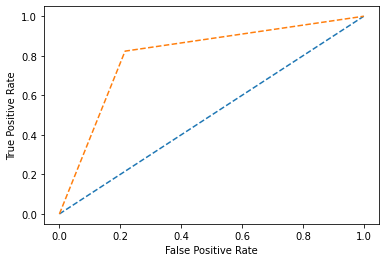

array([[40, 11],
       [ 9, 42]])

In [68]:
pred = logits > 0.3

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))

print("ROC:", roc_auc_score(df['true'], df['pred']))
fpr, tpr, thresholds = roc_curve(df['true'],df['pred'])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

confusion_matrix(df['true'], df['pred'])

0.8235294117647058
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        51
           1       0.79      0.88      0.83        51

    accuracy                           0.82       102
   macro avg       0.83      0.82      0.82       102
weighted avg       0.83      0.82      0.82       102

ROC: 0.8235294117647058


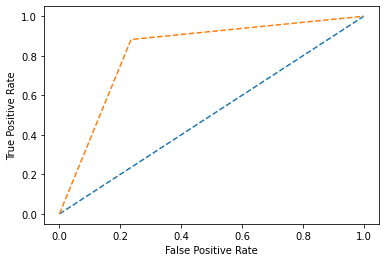

array([[39, 12],
       [ 6, 45]])

In [54]:
pred = logits > 0.5

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))

print("ROC:", roc_auc_score(df['true'], df['pred']))
fpr, tpr, thresholds = roc_curve(df['true'],df['pred'])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

confusion_matrix(df['true'], df['pred'])

0.7933333333333333
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       249
           1       0.44      0.82      0.58        51

    accuracy                           0.79       300
   macro avg       0.70      0.81      0.72       300
weighted avg       0.87      0.79      0.81       300

ROC: 0.805339003071108


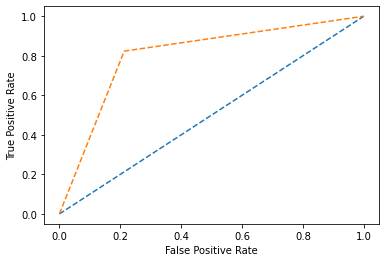

array([[196,  53],
       [  9,  42]])

In [281]:
pred = logits > 0.5

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))

print("ROC:", roc_auc_score(df['true'], df['pred']))
fpr, tpr, thresholds = roc_curve(df['true'],df['pred'])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

confusion_matrix(df['true'], df['pred'])

0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       249
           1       0.78      0.71      0.74        51

    accuracy                           0.92       300
   macro avg       0.86      0.83      0.85       300
weighted avg       0.91      0.92      0.91       300

ROC: 0.8328608551854477


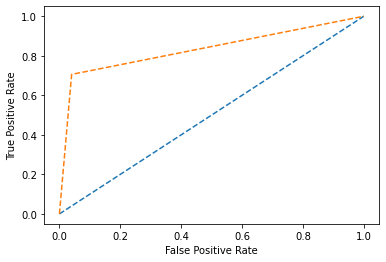

array([[239,  10],
       [ 15,  36]])

In [263]:
# 21/01
pred = logits > 0.7

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))

print("ROC:", roc_auc_score(df['true'], df['pred']))
fpr, tpr, thresholds = roc_curve(df['true'],df['pred'])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

confusion_matrix(df['true'], df['pred'])

In [239]:
pred = logits > 0.7

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))
print("ROC:", roc_auc_score(df['true'], df['pred']))

0.8566666666666667
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       249
           1       0.55      0.80      0.66        51

    accuracy                           0.86       300
   macro avg       0.75      0.84      0.78       300
weighted avg       0.89      0.86      0.87       300

ROC: 0.8356957240727617


In [198]:
pred = logits > 0.7

df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))
print("ROC:", roc_auc_score(df['true'], df['pred']))

0.890881913303438
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       494
           1       0.82      0.74      0.78       175

    accuracy                           0.89       669
   macro avg       0.87      0.84      0.85       669
weighted avg       0.89      0.89      0.89       669

ROC: 0.8430884904569115


In [183]:
df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))
print(roc_auc_score(df['true'], df['pred']))

0.8933333333333333
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       249
           1       0.72      0.61      0.66        51

    accuracy                           0.89       300
   macro avg       0.82      0.78      0.80       300
weighted avg       0.89      0.89      0.89       300



In [112]:
df = pd.DataFrame(index=np.arange(logits.size))

# --- Define columns
df['true'] = np.squeeze(ys)
df['pred'] = np.squeeze(pred)
df['corr'] = df['true'] == df['pred']

# --- Print accuracy
print(df['corr'].mean())
print(classification_report(y_true=df['true'], y_pred=df['pred']))

0.8535127055306427
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       494
           1       0.72      0.73      0.72       175

    accuracy                           0.85       669
   macro avg       0.81      0.81      0.81       669
weighted avg       0.85      0.85      0.85       669

